In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [162]:


df = pd.read_csv('/Users/eric5805/Documents/Data Science/Data_set/i485_origin.csv')
df.columns

Index(['LocationID', 'COUNTY', 'ROUTE', 'LOCATION', 'AADT_2002', 'AADT_2003',
       'AADT_2004', 'AADT_2005', 'AADT_2006', 'AADT_2007', 'AADT_2008',
       'AADT_2009', 'AADT_2010', 'AADT_2011', 'AADT_2012', 'AADT_2013',
       'AADT_2014', 'AADT_2015', 'AADT_2016', 'AADT_2017', 'AADT_2018',
       'AADT_2019', 'AADT_2020', 'AADT_2021', 'AADT_2022', 'AADT_2023'],
      dtype='object')

In [164]:
aadt_cols = ['AADT_2002', 'AADT_2003', 'AADT_2004', 'AADT_2005', 'AADT_2006',
              'AADT_2007', 'AADT_2008', 'AADT_2009', 'AADT_2010', 'AADT_2011',
              'AADT_2012', 'AADT_2013', 'AADT_2014', 'AADT_2015', 'AADT_2016',
              'AADT_2017', 'AADT_2018', 'AADT_2019', 'AADT_2020', 'AADT_2021',
              'AADT_2022', 'AADT_2023']
aadt_df = df[aadt_cols].apply(pd.to_numeric, errors='coerce')
aadt_df.isna().sum()
aadt_df.mean()



AADT_2002    46307.692308
AADT_2003    48923.076923
AADT_2004    55368.421053
AADT_2005    62090.909091
AADT_2006    67045.454545
AADT_2007    62000.000000
AADT_2008    58851.851852
AADT_2009    14954.772727
AADT_2010    14872.670455
AADT_2011    15483.257143
AADT_2012    15538.068182
AADT_2013    16174.585635
AADT_2014    16586.263736
AADT_2015    18946.969697
AADT_2016    21255.276382
AADT_2017    22518.686869
AADT_2018    26594.230769
AADT_2019    22912.254902
AADT_2020    79265.625000
AADT_2021    10787.931034
AADT_2022     9085.964912
AADT_2023    23400.490196
dtype: float64

In [160]:
aadt_df.mean()
# # Compute the mean for each row (exit) and round it to 2 decimal places
# aadt_at_each_exit = aadt_df.T.mean(axis=1).round(2).T

# # Fill missing values row-wise using the computed mean
# aadt_df = aadt_df.T.apply(lambda row: row.fillna(aadt_at_each_exit[row.name]), axis=1)

# df[aadt_cols] = aadt_df
# df.to_csv('/Users/eric5805/Documents/Data Science/Data_set/i485_origin_cleaned.csv', index=False)





AADT_2002    16346.700833
AADT_2003    16513.367500
AADT_2004    16944.833186
AADT_2005    17232.751275
AADT_2006    17767.065000
AADT_2007    17232.455098
AADT_2008    16888.080686
AADT_2009    16015.226961
AADT_2010    15944.393627
AADT_2011    16240.320000
AADT_2012    16093.982206
AADT_2013    16888.712598
AADT_2014    17246.228922
AADT_2015    18968.480392
AADT_2016    21197.401961
AADT_2017    22435.147059
AADT_2018    22923.967304
AADT_2019    22912.254902
AADT_2020    19350.420784
AADT_2021    19590.364853
AADT_2022    19358.256422
AADT_2023    23400.490196
dtype: float64

In [154]:
mean = df[aadt_cols].mean().round(2)
max_of_each_exit = df[aadt_cols].max().round(2)
median = df[aadt_cols].median().round(2)
std = df[aadt_cols].std().round(2)
years = list(range(2002, 2024))

In [158]:
print(len(mean))

22


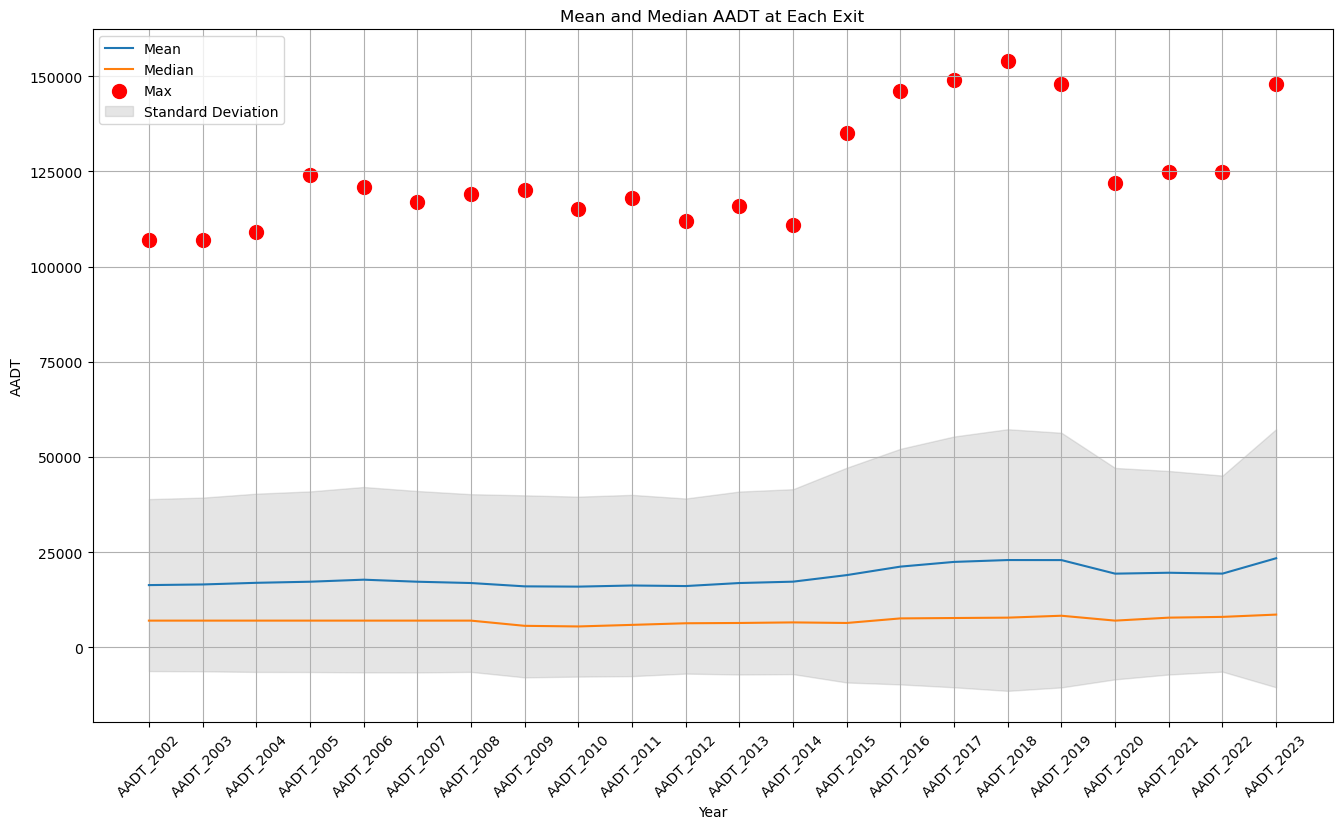

In [144]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 9))
plt.plot(mean, label='Mean')
plt.plot(median, label='Median')
plt.scatter(mean.index, max_of_each_exit, label='Max', color='red', marker='o', s=100)


plt.fill_between(mean.index, mean - std, mean + std, color='gray', alpha=0.2, label='Standard Deviation')

plt.legend()
plt.title('Mean and Median AADT at Each Exit')

plt.xlabel('Year')
plt.ylabel('AADT')
plt.grid(True)
# Ensure x-axis labels are clear
plt.xticks(mean.index, rotation=45)  # Show every 2nd year and rotate

plt.show()
